In [18]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
filename=r'C:\Users\hp\Downloads\cleanedDATA.csv'
df=pd.read_csv(filename)

In [28]:
df_test=df[['drive-wheels','body-style','price']]
df[['price']]=df[['price']].astype('float')

# GROUP BY 

**YOU CAN GROUP BY CATEOGORY COLUMNS ONLY     (IMPORTANT)**

In [20]:
grp=df_test.groupby(['drive-wheels','body-style'],as_index=False).mean()

In [29]:
grp

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


# PIVOTING THE GROUP BY DATAFRAME

In [26]:
grp_pivot=grp.pivot(index='drive-wheels',columns='body-style')

In [80]:
grp_pivot=grp_pivot.fillna(0) #if some data is empty(optional)

In [81]:
grp_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  0.0      0.000000   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

# CONVERTING THE PIVOT TABLE TO HEATMAP

<function matplotlib.pyplot.show(*args, **kw)>

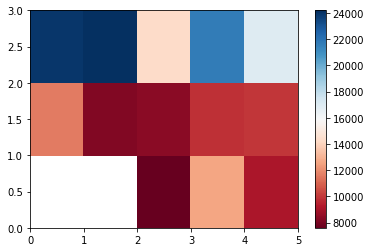

In [32]:
plt.pcolor(grp_pivot,cmap='RdBu')
plt.colorbar()
plt.show

In [33]:
d={'A':['a','b','a','c'],'B':[1,2,1,2]}
op=pd.DataFrame(d)
op

,A,B
0,a,1
1,b,2
2,a,1
3,c,2


In [52]:
qw=op.groupby(['A'],as_index=False).mean()
qw

,A,B
0,a,1
1,b,2
2,c,2


# CORRELATION 

### Regression Plot 

In [42]:
import seaborn as sns
import collections

(-1554.7918172738275, 53903.371686575054)

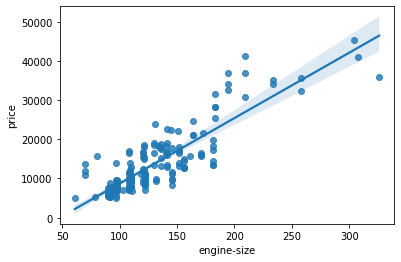

In [50]:
sns.regplot(x='engine-size',y='price', data=df)
plt.ylim()

# PEARSON CORRELATION
### CORRELATION STATISTICS

In [53]:
from scipy import stats

In [56]:
x,y=stats.pearsonr(df['horsepower'],df['price'])
x


0.8095745670036555

# ANOVA (Analysis of Variance)

In [59]:
zx=df[['make','price']]

In [60]:
zx_grp=zx.groupby(['make'])
zx_grp

In [92]:
zx_anova=stats.f_oneway(zx_grp.get_group('honda')['price'],zx_grp.get_group('jaguar')['price'])
zx_anova

F_onewayResult(statistic=400.925870564337, pvalue=1.0586193512077862e-11)

In [71]:
df.corr()

,Unnamed: 0,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,diesel,gas,std,turbo
Unnamed: 0,1.000000,-0.162764,-0.241092,0.125517,0.161848,0.043976,0.252015,0.064820,-0.047764,0.244734,...,-0.022474,-0.195662,0.027956,-0.078346,-0.118214,-0.099157,0.121454,-0.121454,-0.082739,0.082739
symboling,-0.162764,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,...,0.075819,0.279740,-0.035527,-0.029807,-0.082391,0.066171,-0.196735,0.196735,0.054615,-0.054615
normalized-losses,-0.241092,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,...,0.217299,0.239543,-0.225016,0.181189,0.133999,0.238567,-0.101546,0.101546,0.006911,-0.006911
wheel-base,0.125517,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,...,0.371147,-0.360305,-0.470606,0.577576,0.584642,0.476153,0.307237,-0.307237,-0.256889,0.256889
length,0.161848,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,...,0.579821,-0.285970,-0.665192,0.707108,0.690628,0.657373,0.211187,-0.211187,-0.230085,0.230085
width,0.043976,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,...,0.615077,-0.245800,-0.633531,0.736728,0.751265,0.673363,0.244356,-0.244356,-0.305732,0.305732
height,0.252015,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,...,-0.087027,-0.309974,-0.049800,0.084301,0.135486,0.003811,0.281578,-0.281578,-0.090336,0.090336
curb-weight,0.064820,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,...,0.757976,-0.279361,-0.749543,0.836921,0.834415,0.785353,0.221046,-0.221046,-0.321955,0.321955
engine-size,-0.047764,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,...,0.822676,-0.256733,-0.650546,0.783465,0.872335,0.745059,0.070779,-0.070779,-0.110040,0.110040
bore,0.244734,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,...,0.566936,-0.267392,-0.582027,0.559112,0.543155,0.554610,0.054458,-0.054458,-0.227816,0.227816


In [72]:
df[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566936
stroke,-0.055390,1.000000,0.187871,0.098267
compression-ratio,0.001263,0.187871,1.000000,-0.214514
horsepower,0.566936,0.098267,-0.214514,1.000000


In [74]:
df['engine-size']

0      130
1      130
2      152
3      109
4      136
      ... 
196    141
197    141
198    173
199    145
200    141
Name: engine-size, Length: 201, dtype: int64

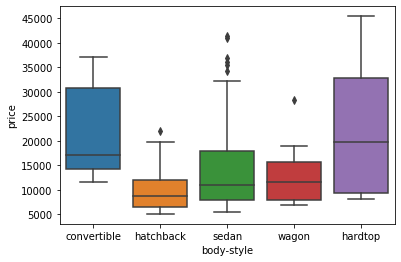

In [75]:
sns.boxplot(x="body-style", y="price", data=df)

In [76]:
df.describe(include=['object'])

,make,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201
unique,22,2,5,3,2,6,7,8,3
top,toyota,four,sedan,fwd,front,ohc,four,mpfi,low
freq,32,115,94,118,198,145,157,92,153


In [77]:
df['drive-wheels'].value_counts()


fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [78]:
df['drive-wheels'].value_counts().to_frame()

,drive-wheels
fwd,118
rwd,75
4wd,8


In [79]:
df['drive-wheels'].unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

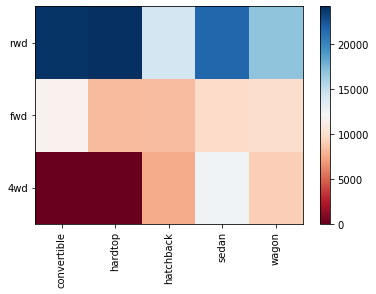

In [91]:
fig, ax = plt.subplots()
im = ax.pcolor(grp_pivot, cmap='RdBu')

#label names
row_labels = grp_pivot.columns.levels[1]
col_labels = grp_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grp_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grp_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotate label if too long
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()